In [125]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plot
import seaborn as sns
!pip install wordcloud
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
import collections
import matplotlib.cm as cm
!pip install --user seaborn==0.11.0


### Importing data from CSV file 

In [3]:
df = pd.read_csv("spotify_songs_data.csv")


### Description of the DataSet

In [4]:
# Intial rows of dataset
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [5]:
# Total no. of rows and columns
df.shape

(32833, 23)

In [6]:
# Statistical data of dataset
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [7]:
# Knowing about data types, number of null values in each column of data set for further analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

### Total number of numerical and categorical columns in the data set

In [8]:
num_cat = df.applymap(np.isreal).all()

In [9]:
#All columns with numerical values will return true, otherwise return false.
(num_cat).value_counts()

True     13
False    10
dtype: int64

### Are there any null values?

In [10]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

Data set had 5 null values in track_name, track_artist , track_album_name. Since  removing those observations/null values are not expected to affect our approach because the number of null values are very very less as compared to total data,  we remove these incomplete observations



In [11]:
df.dropna(inplace=True)
df.isnull().sum()


track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

#### Removed those rows consisting of null values 

## Any unwanted columns to be removed?

The columns playlist_id, playlist_name,playlist_subgenre will not be used in the ensuing analysis. Hence we proceed to remove these columns as well

In [12]:
df.drop(['playlist_id','playlist_name','playlist_subgenre'], axis=1,inplace=True)
df.shape

(32828, 20)

In [13]:
# Are there any duplicate values?
df.duplicated().sum()

2448

## How are the variables distributed?


 Box plot of the audio features

#### Distribution of loudness


<AxesSubplot:title={'center':'Loudness'}>

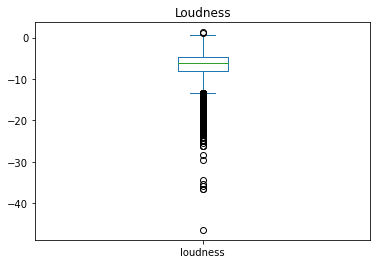

In [14]:
df['loudness'].plot(kind='box', title='Loudness')


#### Distribution of instrumentalness


<AxesSubplot:title={'center':'Instrumentalness'}>

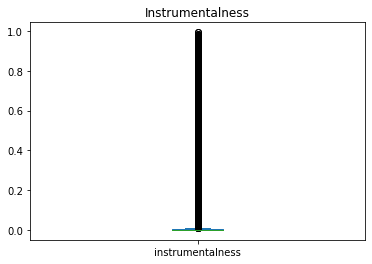

In [15]:
df['instrumentalness'].plot(kind='box', title='Instrumentalness')


#### Distribution of tempo


<AxesSubplot:title={'center':'Tempo'}>

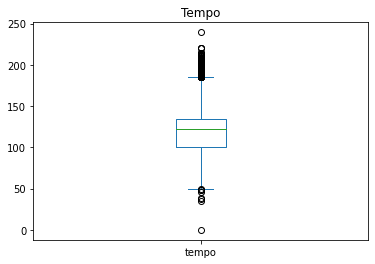

In [16]:
df['tempo'].plot(kind='box', title='Tempo')


#### Distribution of duration_ms


<AxesSubplot:title={'center':'duration_ms'}>

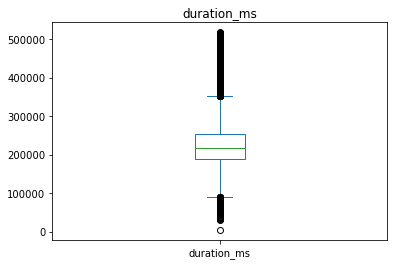

In [17]:
df['duration_ms'].plot(kind='box', title='duration_ms')


#### Distribution across rest of the variables

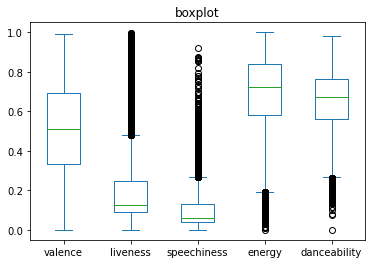

In [18]:
ax = df[['valence', 'liveness','speechiness','energy','danceability']].plot(kind='box', title='boxplot')

There are common outliers in all the variables that have values equal to 0 across multiple variables.We remove those observations as well.

## Removing outliers

In [19]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out



Removing outliers in tempo column


<AxesSubplot:title={'center':'Tempo'}>

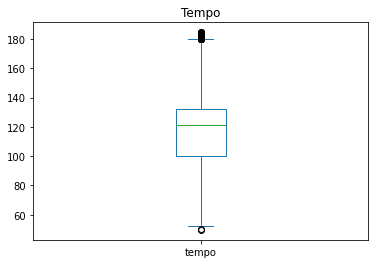

In [20]:

df = remove_outlier(df,'tempo')
df['tempo'].plot(kind='box', title='Tempo')


<AxesSubplot:title={'center':'loudness'}>

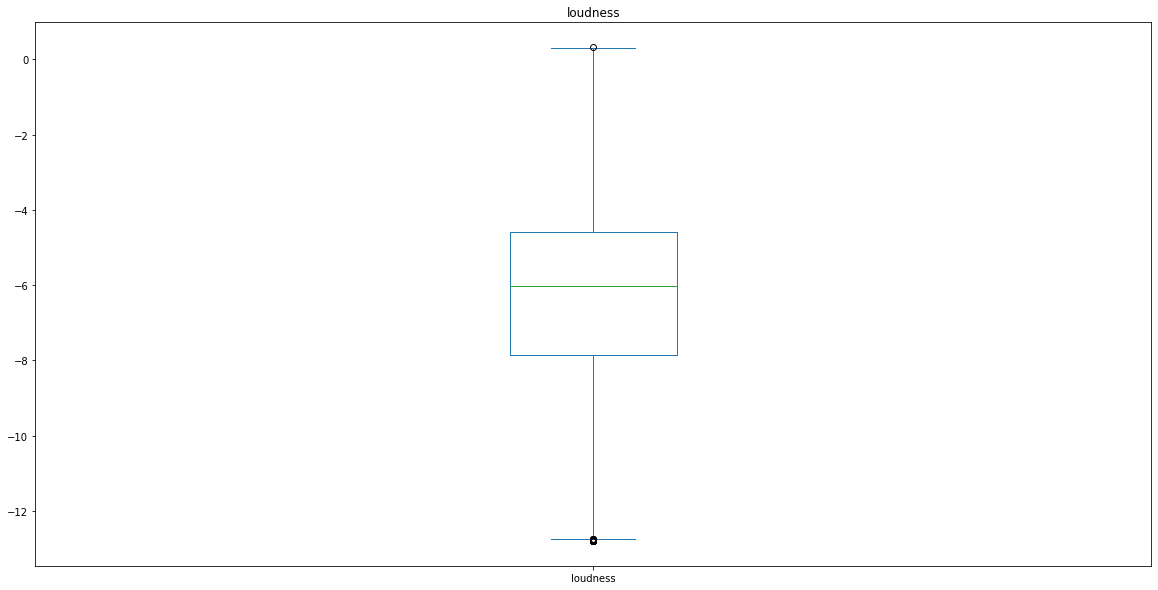

In [82]:
df = remove_outlier(df,'loudness')
df['loudness'].plot(kind='box', title='loudness')

## Data Manipulation 
#### creating 2 new columns

year - which will have the year of release of the album / song

durn_minutes - which will have the duration of the song in minutes

In [21]:
#creating a year columns
df['year'] = pd.DatetimeIndex(df['track_album_release_date']).year


In [22]:
#Creating a duration in minutes column
df['durn_minutes'] = df['duration_ms']/(1000*60)


In [23]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_genre,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,durn_minutes
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,pop,0.748,0.916,...,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,3.245900
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,pop,0.726,0.815,...,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,2.710000
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,pop,0.675,0.931,...,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,2.943600
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,pop,0.718,0.930,...,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,2.818217
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,pop,0.650,0.833,...,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,3.150867


In [114]:
df.shape

(29165, 22)

### Songs with least popularity in spotify?

In [39]:
sorted_df = df.sort_values('track_popularity', ascending = True).head(10)
sorted_df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_genre,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,durn_minutes
24500,4IzQn9XTheOsTLaTF1OUox,Anytime,Brian McKnight,0,7mbTAaTccVSXAFWsrW7H4w,Night Grooves,2000-01-01,r&b,0.739,0.452,...,1,0.0309,0.0183,0.000905,0.0410,0.517,129.832,274173,2000,4.569550
3333,63U6DJ2Q7alA97eUkFdwDv,Sucédeme,Jotdog,0,0eaya7r75rAc2YbwxExTqL,Turista del Amor,2012-01-17,pop,0.628,0.520,...,1,0.0296,0.1470,0.000005,0.0917,0.273,135.003,238027,2012,3.967117
3334,63mlCw3VtGUOoR6LI6UwZb,Piensa en Mí,Jotdog,0,1MtI85JNVgIxNwqLBZA01x,Jotdog,2009,pop,0.588,0.531,...,1,0.0250,0.6580,0.000005,0.0889,0.124,80.000,230827,2009,3.847117
9481,5HXbcoccdDpoMsPdbnB9MA,Дядя Билли,Nurminsky,0,3Jg8Mc1T7AFyivEcXgre4W,Дядя Билли,2018-08-16,rap,0.798,0.722,...,0,0.1030,0.5960,0.000000,0.2360,0.686,75.031,194194,2018,3.236567
9472,1PrJ1Taj9r5c7DjwwiIbXW,Караван,Ashim,0,6EASEZD5e9jeWgZsfU63nv,Караван,2018-11-29,rap,0.624,0.452,...,1,0.3920,0.1590,0.000002,0.1240,0.120,70.831,169209,2018,2.820150


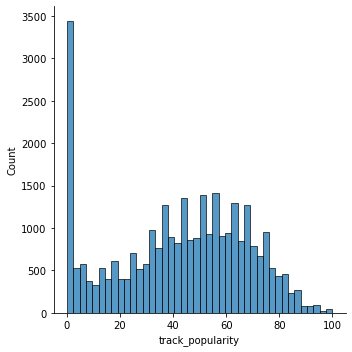

In [93]:
sns.displot(data=df, x='track_popularity')

### Songs with highest popularity

In [44]:
top_songs = df.query('track_popularity>90', inplace=False).sort_values('track_popularity',ascending =False)
top_songs[:10]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_genre,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,durn_minutes
20091,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,latin,0.824,0.588,...,0,0.0924,0.6920,0.000104,0.1490,0.513,98.027,209438,2019,3.490633
1551,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,pop,0.824,0.588,...,0,0.0924,0.6920,0.000104,0.1490,0.513,98.027,209438,2019,3.490633
21468,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,r&b,0.621,0.601,...,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636,2019,2.727267
23104,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,r&b,0.621,0.601,...,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636,2019,2.727267
30202,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,edm,0.621,0.601,...,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636,2019,2.727267
20092,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,latin,0.621,0.601,...,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636,2019,2.727267
18756,7k4t7uLgtOxPwTpFmtJNTY,Tusa,KAROL G,98,7mKevNHhVnZER3BLgI8O4F,Tusa,2019-11-07,latin,0.803,0.715,...,1,0.2980,0.2950,0.000134,0.0574,0.574,101.085,200960,2019,3.349333
5508,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,rap,0.896,0.586,...,0,0.0559,0.1040,0.000000,0.7900,0.642,116.971,196653,2019,3.277550
23103,7k4t7uLgtOxPwTpFmtJNTY,Tusa,KAROL G,98,7mKevNHhVnZER3BLgI8O4F,Tusa,2019-11-07,r&b,0.803,0.715,...,1,0.2980,0.2950,0.000134,0.0574,0.574,101.085,200960,2019,3.349333
18330,21jGcNKet2qwijlDFuPiPb,Circles,Post Malone,98,4g1ZRSobMefqF6nelkgibi,Hollywood's Bleeding,2019-09-06,latin,0.695,0.762,...,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,215280,2019,3.588000


## Univariate Analysis

### The spread across genres
Finding out the distribution of songs across genres.

What genre has the most number of songs in the dataset?

In [24]:
## Total number of genres
no_of_genres = len(pd.unique(df['playlist_genre']))
no_of_genres

6

### Numerical Univariate Analysis:

C:\Users\SAI BARGAV N\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1841: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='playlist_genre'>

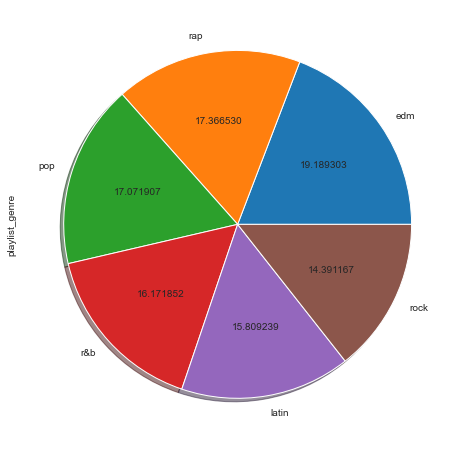

In [175]:
plt.figure(figsize=(16,8))
df['playlist_genre'].value_counts(normalize=True).plot.pie(autopct='%2f', shadow=True)


#### EDM is the genre in which most songs have been released, followed by rap and then pop.

## Who are the artists with the most releases?

### Categorical Univariate analysis

<AxesSubplot:>

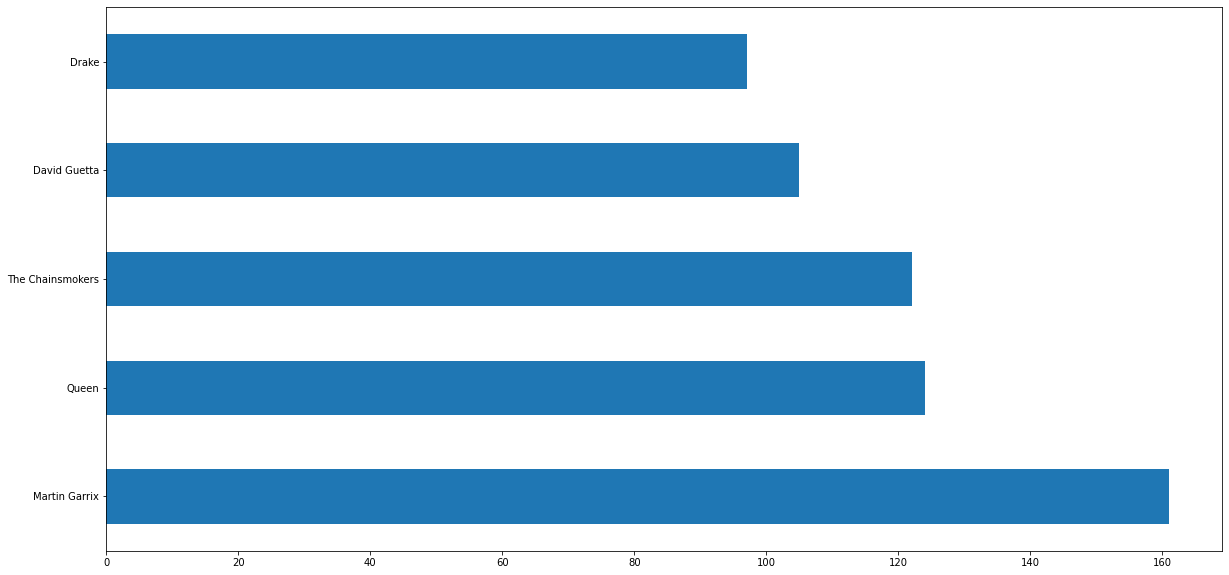

In [99]:
data = df.track_artist.value_counts().head().plot.barh()
data

In [27]:
df.track_artist.value_counts(normalize=True)

Martin Garrix          0.004991
Queen                  0.004185
The Chainsmokers       0.003782
David Guetta           0.003255
Drake                  0.003038
                         ...   
New Radicals           0.000031
Natalie Imbruglia      0.000031
Stone Temple Pilots    0.000031
Eddie Vedder           0.000031
Mat Zo                 0.000031
Name: track_artist, Length: 10582, dtype: float64

#### With 161 tracks in their name, Martin Garrix have been the busiest artists over time. David Guetta comes in second with 135 tracks

### Numerical Univariate
###  Number of Songs released in each year?
Is there something as a golden age of music? A span of years when a lot of songs were released? The graph below will tell us

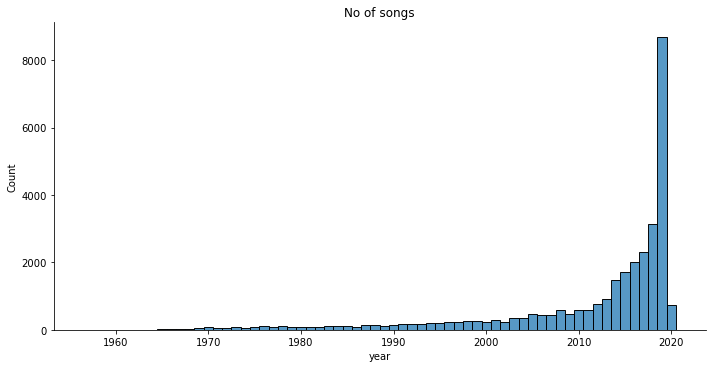

In [146]:

sns.displot(df['year'],discrete=True,aspect=2,height=5,kind="hist").set(title="No of songs")

 #### The above plot tells us the number of songs for each year in the dataset according to their release date have increased in recent years since music became accessbile to people because of advancement in technology
#### Earlier years there were very few songs that used to release in that time (in the period of ~1970) the technology is not advanced as it was now also the number of singers also less.

### What are the popular words featuring in titles?

Here I am using word cloud, to find the popular words

## Word Cloud
Word Cloud displays the top words in the form of a cloud. As the frequency of any word increases in the complete dataset, the size of the word increases in the cloud. It is very useful to visualize data in form of frequency 


I will be working with "track_name". So, I convert all the "track_name" to lower case using lower() method and combine them into a variable "all_track_name".

In [28]:
all_track_name = ''.join(map(str, df['track_name'])).lower()
all_track_name

'i don\'t care (with justin bieber) - loud luxury remixmemories - dillon francis remixall the time - don diablo remixcall you mine - keanu silva remixsomeone you loved - future humans remixbeautiful people (feat. khalid) - jack wins remixnever really over - r3hab remixpost malone (feat. rani) - gattüso remixtough love - tiësto remix / radio editif i can\'t have you - gryffin remixcross me (feat. chance the rapper & pnb rock) - m-22 remixhate me - r3hab remixbody on mysos - laidback luke tribute remix / radio editsummer days (feat. macklemore & patrick stump of fall out boy) - tiësto remixsouth of the border (feat. camila cabello & cardi b) - andy jarvis remixall my friends - eden prince remixsay my name (feat. bebe rexha & j balvin) - lucas & steve remixdancing with a stranger (with normani) - cheat codes remixlet it be me - sondr remixheaven - david guetta & morten remixall around the world (la la la) - marnik remixdon\'t leave me alone (feat. anne-marie) - edx\'s indian summer remixs

In [29]:
all_track_name = ''.join(map(str, df['track_name'])).lower()
stopwords = STOPWORDS
stopwords.add('English')
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_track_name)


In [30]:
wordcloud

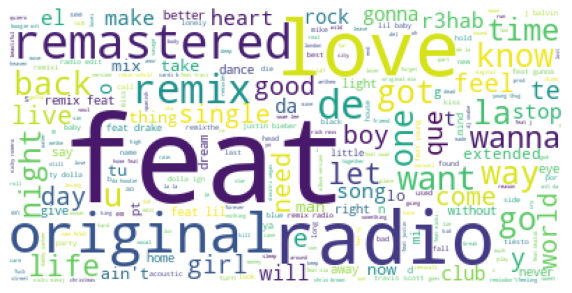

In [31]:
rcParams['figure.figsize'] = 10, 20
plot.imshow(wordcloud)
plot.axis("off")
plot.show()

From the image, we can clearly see the top words that appear the most in title are as Love, Feat, radio, original.
Its quite obvious to have these word in the title.

#### Verify the top words using the bar charts.

In [32]:
filtered_words = [word for word in all_track_name.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

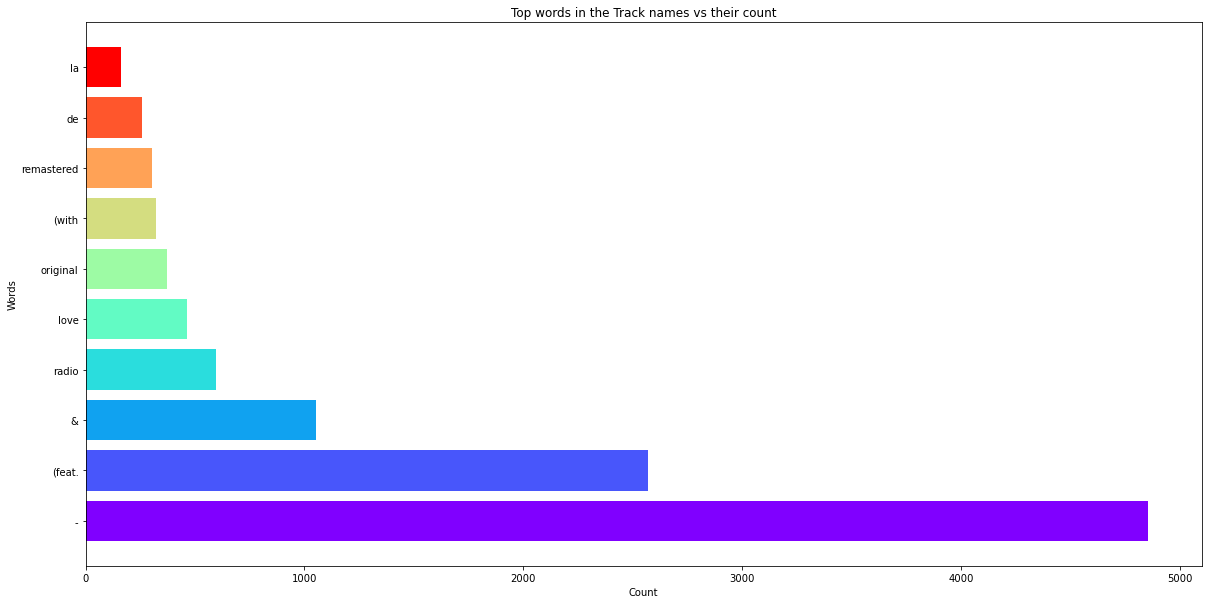

In [33]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plot.title('Top words in the Track names vs their count')
plot.xlabel('Count')
plot.ylabel('Words')
plot.barh(words, counts, color=colors)

In [34]:
a=df.year.value_counts()
a

2019    8934
2018    3269
2017    2393
2016    2084
2015    1744
        ... 
1960       4
1962       2
1957       2
1958       1
1961       1
Name: year, Length: 63, dtype: int64

### Bivariate Analysis

###  Correlation between variables
Visualizing the Correlation between variables using Heatmap after dropping some unwanted columns.

In [54]:
#corr_df = df.corr(method="pearson")

The Pearson correlation : It measures the strength of the linear relationship between two variables. It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.

C:\Users\SAIBAR~1\AppData\Local\Temp/ipykernel_18048/1929243130.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=sns.heatmap(df.corr(), annot=True)


Text(0.5, 1.0, 'Correlation HeatMap between variables')

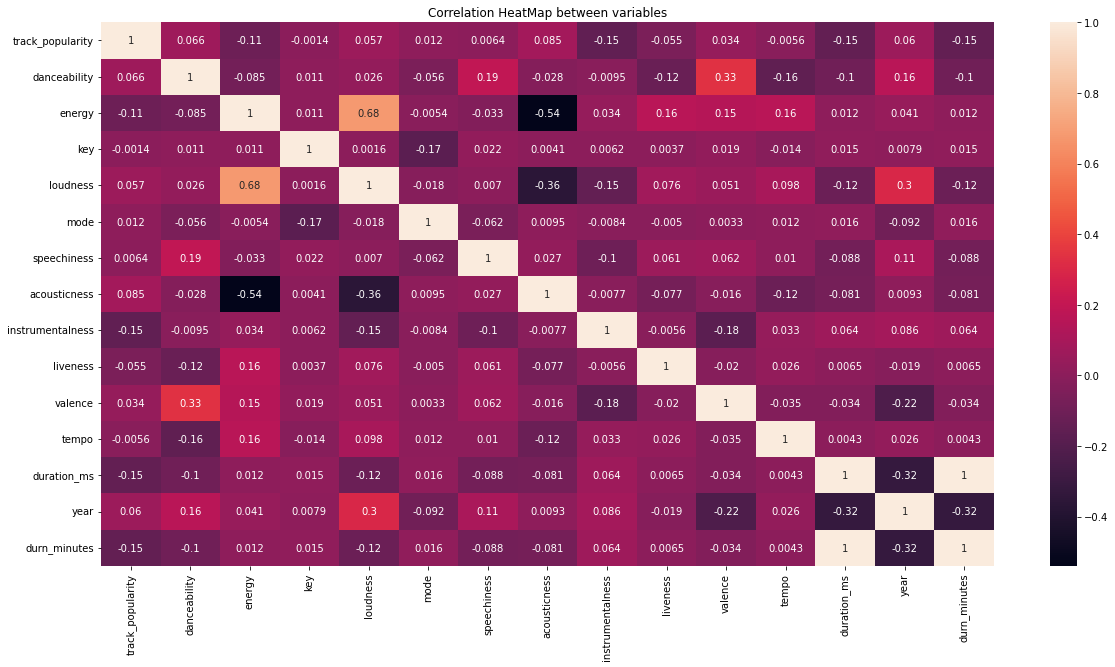

In [77]:
corr=sns.heatmap(df.corr(), annot=True)
corr.set_title("Correlation HeatMap between variables")

#### The legend of the graph shows us how the color gets lighter as the correlation increases. We observe that there is no significant positive correlation between popularity and a song's feature. The most positive correlation occurs between popularity, danceability, loudness, and energy.

#### From this heatmap we can conclude that durn_minutes and tempo has highly positively correlated.


In [105]:
sorted_df_1 = df.sort_values('track_popularity', ascending = True).head(100)
sorted_df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_genre,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,durn_minutes
8934,4D7DNBqLovDRh4kqYEjAqR,Halbes Kilo Gold,Milonair,0,2qaKfxIrqFWNZgwgbrwZ1U,Halbes Kilo Gold,2018-06-01,rap,0.528,0.747,...,1,0.3220,0.22900,0.000000,0.0952,0.141,86.659,155962,2018,2.599367
20219,2vX03yHcVtFUg2ZMuzhLhS,Outlaw - Original Mix,La Fuente,0,7jV5akfXEXsoNsqrekDCyX,Outlaw,2014-04-21,latin,0.557,0.979,...,1,0.0489,0.00130,0.834000,0.0483,0.856,127.998,288805,2014,4.813417
30612,6W8TXRdNeC8QkiOrR3oW4J,Guardian Angel,Joe Ghost,0,1f2Zs0wpLvbTDGxRMseCPt,Guardian Angel,2017-02-10,edm,0.530,0.661,...,1,0.0460,0.03330,0.000286,0.0732,0.192,159.977,189000,2017,3.150000
2583,2oljJbP2VVGt057AlH9MtU,Guilty,Neon Dreams,0,4cIPsFMRzc6O0jNNXkFwC7,Guilty,2018-08-24,pop,0.857,0.855,...,1,0.2240,0.05220,0.000000,0.2010,0.557,115.038,165749,2018,2.762483
30607,6OsDagqIzRrpRHwAUkeVy2,Out of the Dark,RBYN,0,0IYLOwG0XfjEXApCvuN4wg,Out of the Dark,2017-04-14,edm,0.345,0.852,...,1,0.1230,0.03390,0.000003,0.1330,0.326,149.823,204925,2017,3.415417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11338,1ixeHnO23pDi2A0AWBWmKh,Another Day,Paul McCartney,0,4FqFaw9BTntS6dZkk0PNe4,Wingspan (UK Version),2001-05-07,rock,0.706,0.402,...,1,0.0324,0.18300,0.000122,0.0755,0.827,122.233,221840,2001,3.697333
11343,41TcraLQnuKmJuJ13nNwSd,Helen Wheels,Paul McCartney,0,4FqFaw9BTntS6dZkk0PNe4,Wingspan (UK Version),2001-05-07,rock,0.401,0.824,...,1,0.0356,0.00625,0.002780,0.3440,0.659,146.125,224840,2001,3.747333
30493,5RraLIzcFELGf3Bip8t9Q0,HOLUP!,BOBBY,0,6LrLNdxbjjuuLolFqL3qXn,The MOBB,2016-09-07,edm,0.666,0.948,...,1,0.0638,0.13700,0.000000,0.1920,0.523,100.996,211931,2016,3.532183
2770,3SADw9igVOXqZkvyrjfYiq,Esa Fuerza,Javiera Mena,0,3BEtvyK449N9l2NiXsjSmq,Otra Era,2014-10-28,pop,0.613,0.892,...,1,0.0324,0.00135,0.000274,0.1050,0.537,128.990,273522,2014,4.558700


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30887 entries, 0 to 32832
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  30887 non-null  object 
 1   track_name                30887 non-null  object 
 2   track_artist              30887 non-null  object 
 3   track_popularity          30887 non-null  int64  
 4   track_album_id            30887 non-null  object 
 5   track_album_name          30887 non-null  object 
 6   track_album_release_date  30887 non-null  object 
 7   playlist_genre            30887 non-null  object 
 8   danceability              30887 non-null  float64
 9   energy                    30887 non-null  float64
 10  key                       30887 non-null  int64  
 11  loudness                  30887 non-null  float64
 12  mode                      30887 non-null  int64  
 13  speechiness               30887 non-null  float64
 14  acoust

### How loudness and energy are related?

### Numerical - Numerical

Inorder to find the realtion between energy and loudness, I am creating one new temporary dataframe.


In [127]:
sample_df = df.sample(int(0.004*len(df)))
len(sample_df)

123

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

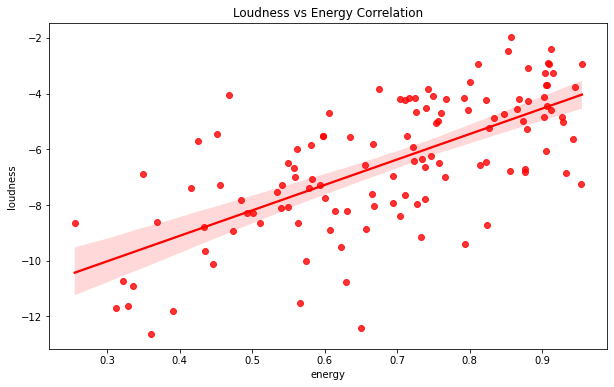

In [132]:
plot.figure(figsize=(10,6))
sns.regplot(data=sample_df, y="loudness", x="energy", color = 'r').set(title="Loudness vs Energy Correlation")

So we can see here clearly there is very high positive correlation between loudness and energy, on the y-axis we have loudness and on the x-axis we have energy and we can see all the data points or the songs are in one direction, So 
if the energy increases then loudness of the song also increases, ans also 
if the loudness decreases energy also increases. So there is a very high positive correlation that can be also observed from that regression line in the plot.




[Text(0.5, 1.0, 'track_popularity vs Acousticness')]

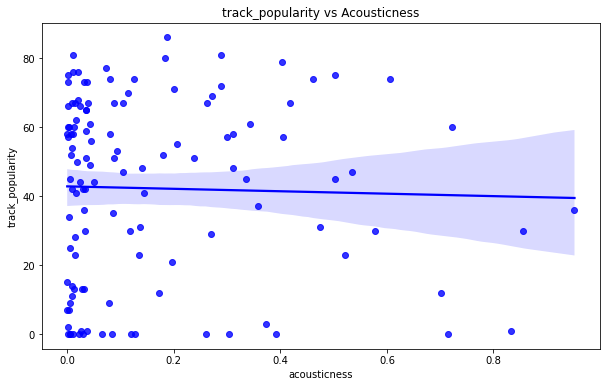

In [147]:
# Also finding the relation between some other variables from the data set

plot.figure(figsize=(10,6))
sns.regplot(data=sample_df, y="track_popularity", x="acousticness", color = 'b').set(title="track_popularity vs Acousticness")

# Acousticness : A confidence measure from 0.0 to 1.0 of whether the track is acoustic.1 represents high confidence the track is acoustic


Regression line is tending downwards, which means if Acousticness of the song increases the popularity decreases and vice versa.

### What was the duration of songs in earlier years as compared to recent years.
### Comparing duration of songs with year

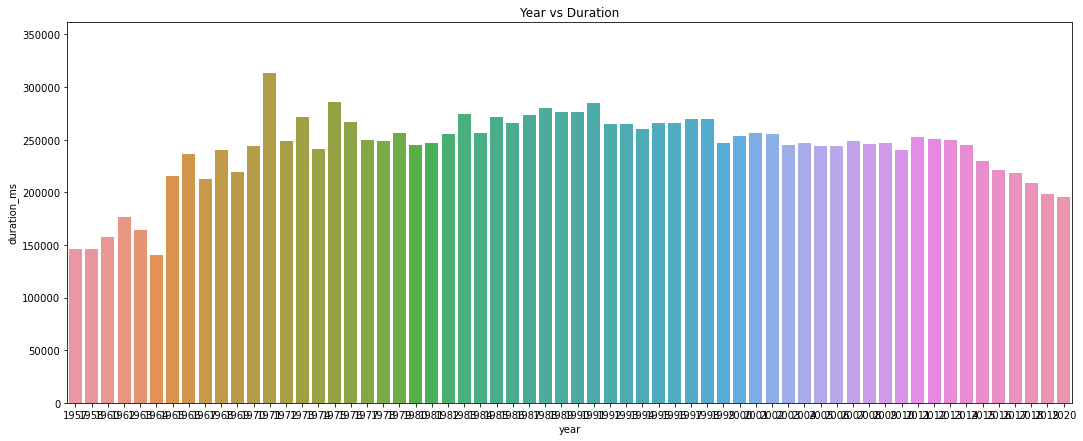

In [156]:
total_dr = df.duration_ms
fig_dims = (18,7)
fig, ax = plt.subplots(figsize = fig_dims)
fig = sns.barplot(x= df["year"], y=total_dr, ax=ax, errwidth=False).set(title = "Year vs Duration")


We could see that in ~1960's the duration of the songs was less, and duration got increased in 1970's and remain continued that duration till 2010 and in recent years we could see there is there is a trend of duration decrease.

### Visualizing the duration of songs over the years using line plot

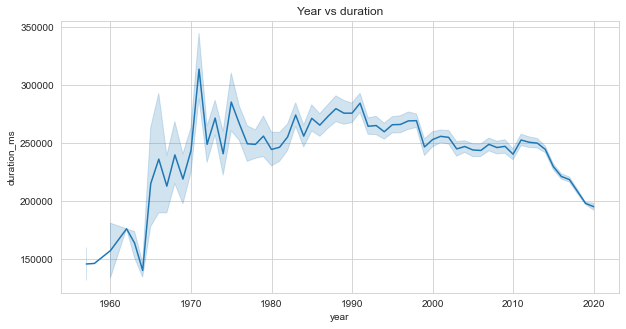

In [162]:
total_dr = df.duration_ms
sns.set_style(style="whitegrid")
fig_dims = (10,5)
fig,ax = plt.subplots(figsize = fig_dims)
fig= sns.lineplot(x=df['year'],y=total_dr,ax=ax).set(title = "Year vs duration")


### Duration of songs in different genres

### Categorical to Numerical Analysis

Text(0, 0.5, 'Genres')

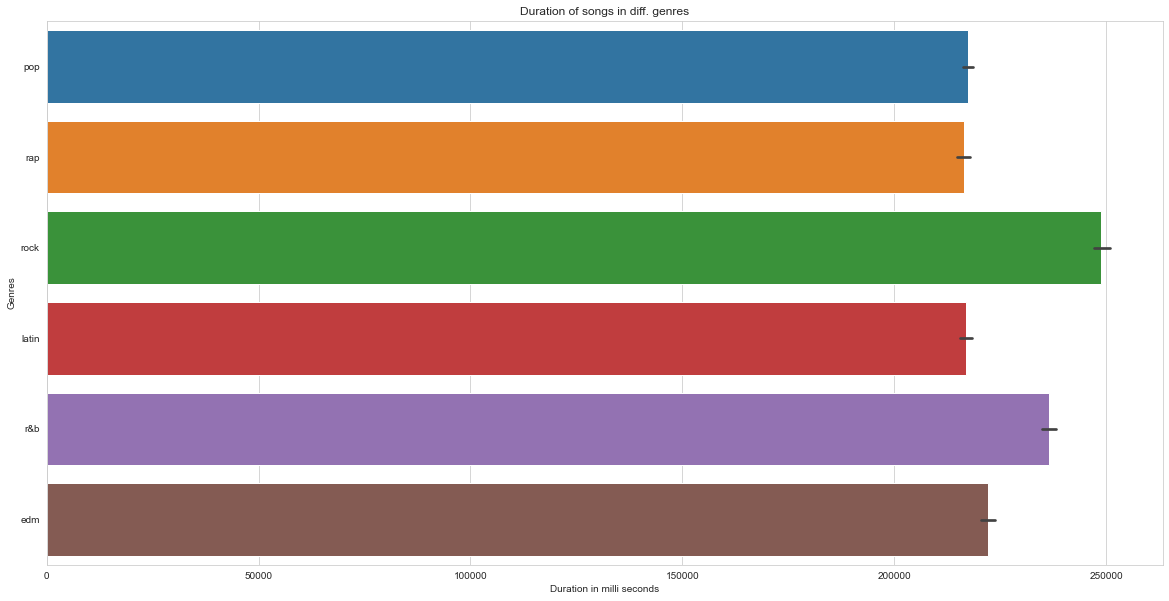

In [167]:
plot.title("Duration of songs in diff. genres")
sns.color_palette("rocket", as_cmap=True)
sns.barplot(y='playlist_genre', x='duration_ms', data=df)
plot.xlabel('Duration in milli seconds')
plot.ylabel("Genres")

Rock genre has highest duration as compared to others.

### Comparing genre of a song and popularity of that song

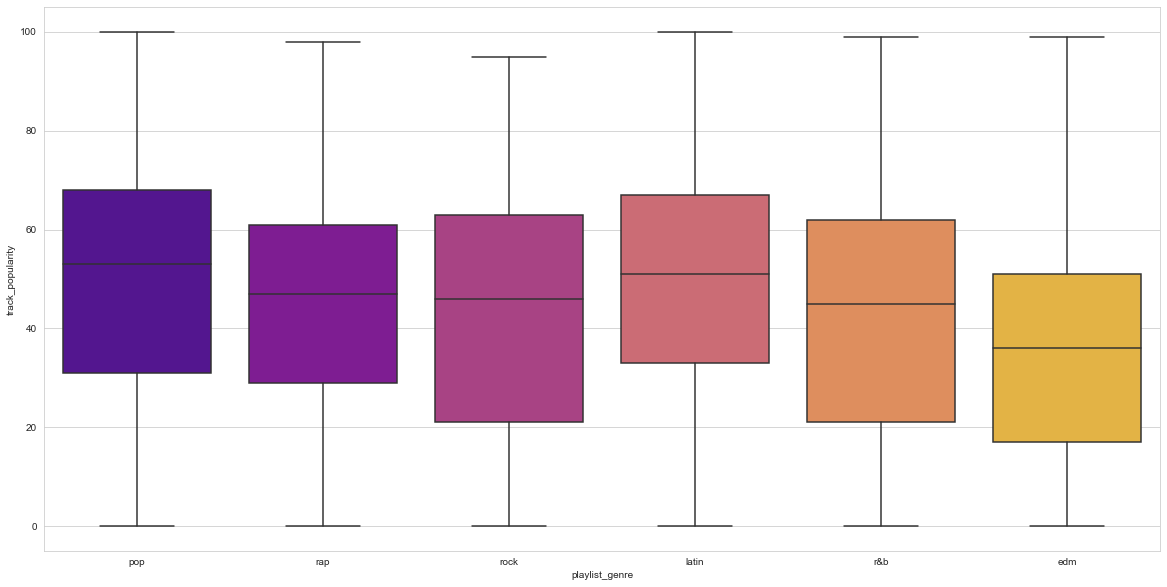

In [179]:
ax=sns.boxplot(data=df, x='playlist_genre', y='track_popularity', palette='plasma')

From this above plot we can conclude that pop music has highest mean that means the popularity to the pop type is more when compared to other type of forms

### Statistical Analysis

In [181]:
df.mean()

C:\Users\SAIBAR~1\AppData\Local\Temp/ipykernel_18048/3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


track_popularity        42.614951
danceability             0.658625
energy                   0.712301
key                      5.381293
loudness                -6.352762
mode                     0.563959
speechiness              0.106400
acousticness             0.164713
instrumentalness         0.079441
liveness                 0.191335
valence                  0.511640
tempo                  119.821071
duration_ms         225669.220319
year                  2011.572798
durn_minutes             3.761154
dtype: float64

In [191]:
df.median()

C:\Users\SAIBAR~1\AppData\Local\Temp/ipykernel_18048/530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


track_popularity        45.000000
danceability             0.674000
energy                   0.730000
key                      6.000000
loudness                -6.018000
mode                     1.000000
speechiness              0.062700
acousticness             0.076100
instrumentalness         0.000013
liveness                 0.128000
valence                  0.513000
tempo                  121.914000
duration_ms         215625.000000
year                  2016.000000
durn_minutes             3.593750
dtype: float64

In [192]:
df.mode()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_genre,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,durn_minutes
0,7BKLCZ1jbUBVqRi2FVlTVw,Poison,Martin Garrix,0.0,5L1xcowSxwzFUSJzvyMp48,Greatest Hits,2020-01-10,edm,0.733,0.787,...,1.0,0.102,0.128,0.0,0.111,0.43,127.992,192000.0,2019.0,3.2
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240000.0,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
np.std(df)

C:\Users\SAI BARGAV N\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3558: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


track_popularity       25.060583
danceability            0.142550
energy                  0.168163
key                     3.609211
loudness                2.396249
mode                    0.495892
speechiness             0.099818
acousticness            0.206423
instrumentalness        0.216257
liveness                0.154471
valence                 0.231648
tempo                  25.145825
duration_ms         58852.442710
year                   10.927754
durn_minutes            0.980874
dtype: float64